In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("Temperature - anomalies - 2015 to 2019.csv", encoding="latin1")


In [9]:
#display the first few rows
df.head()

,Year-wise,Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)
0,2019,0.95
1,2018,0.83
2,2017,0.91
3,2016,1.00
4,2015,0.93


In [13]:
df.info() #to check data types
df.isnull().sum() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Year-wise                                                                   5 non-null      int64  
 1   Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 212.0 bytes


Year-wise                                                                     0
Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)    0
dtype: int64

In [15]:
df["Baseline"] = 0  # Adding a column with all values as 0


In [18]:
df["Above_Baseline"] = df.iloc[:, 1] > df["Baseline"]  # True if above 0°C


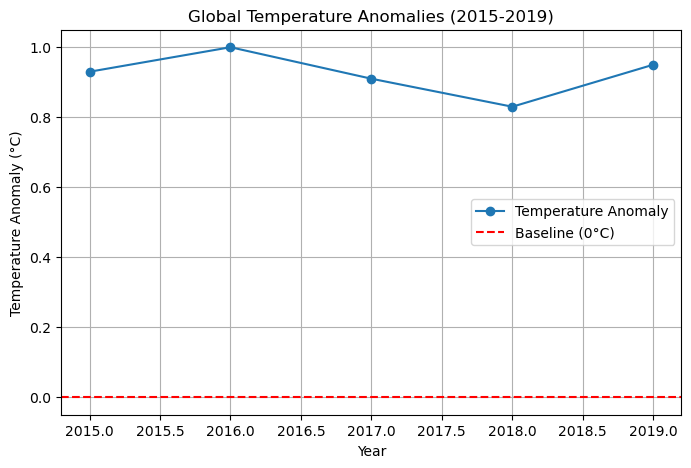

In [20]:
import matplotlib.pyplot as plt

# Plotting the anomalies
plt.figure(figsize=(8, 5))
plt.plot(df["Year-wise"], df.iloc[:, 1], marker='o', linestyle='-', label="Temperature Anomaly")
plt.axhline(y=0, color='r', linestyle='--', label="Baseline (0°C)")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Anomalies (2015-2019)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# To set color based on anomaly values
colors = ["blue" if temp < 0 else "red" for temp in df.iloc[:,1]]

<BarContainer object of 5 artists>

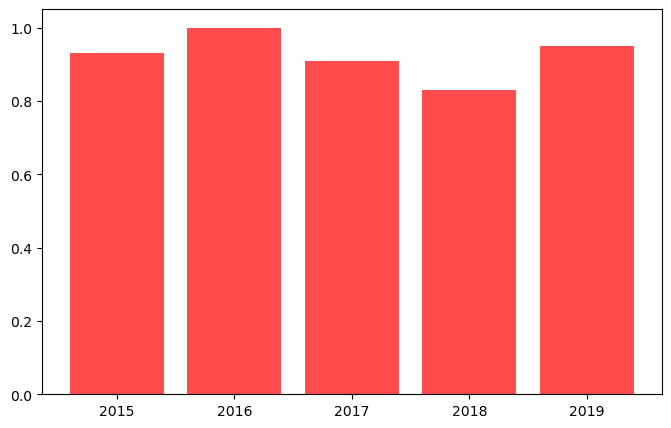

In [30]:
#Plotting
plt.figure(figsize=(8,5))
plt.bar(df["Year-wise"], df.iloc[:,1], color=colors, alpha=0.7, label="Temperature Anomaly")

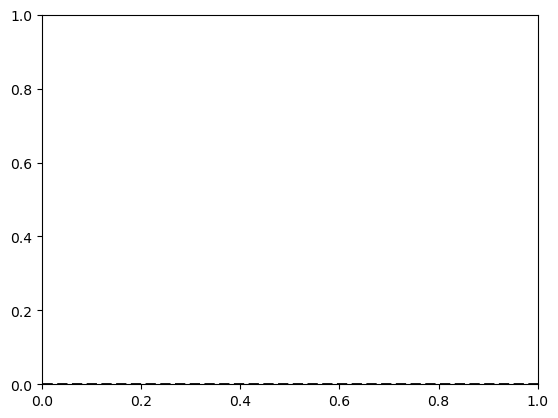

In [34]:
# To add baseline reference
plt.axhline(y=0,color='black',linestyle='--', linewidth=2, label= "Baseline (0°C)")

In [48]:
print(df.dtypes)

Year-wise                                                                       int64
Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)    float64
Baseline                                                                        int64
Above_Baseline                                                                   bool
dtype: object


In [50]:
column_name = "Global Temperature Anomaly (°C) (Climatology based on the period 1901-2000)"

In [56]:
# to set figure size and style
plt.figure(figsize=(12,6))
import matplotlib.style as style
plt.style.use('ggplot')  # Use an available style

<Figure size 1200x600 with 0 Axes>

In [64]:
print(df.columns)

Index(['Year-wise',
       'Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)',
       'Baseline', 'Above_Baseline'],
      dtype='object')


In [66]:
# Fix column names by stripping spaces and replacing any irregularities
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Use the corrected column name
column_name = df.columns[1]  # Assuming this is the correct index

# Generate colors based on temperature anomalies
colors = ['red' if temp > 0 else 'blue' for temp in df[column_name]]


In [68]:
#define colors: Red for positive anomalies, blue for negative anomalies
colors = ['red' if temp > 0 else 'blue' for temp in df[column_name]]

In [70]:
#set figure and style
plt.figure(figsize=(12, 6))
plt.style.use('ggplot')

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 5 artists>

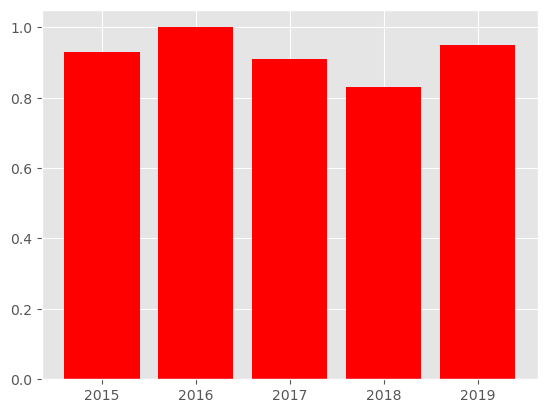

In [72]:
#create bar plot
plt.bar(df['Year-wise'], df[column_name], color= colors)

In [78]:
# Convert 'Year-wise' column to numeric if not already
df['Year-wise'] = pd.to_numeric(df['Year-wise'], errors='coerce')

Year-wise                                                                       int64
Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)    float64
Baseline                                                                        int64
Above_Baseline                                                                   bool
dtype: object
   Year-wise  \
0       2019   
1       2018   
2       2017   
3       2016   
4       2015   

   Global Temperature Anomaly (°C) (Climatology based on the period1901-2000)  
0                                               0.95                           
1                                               0.83                           
2                                               0.91                           
3                                               1.00                           
4                                               0.93                           
Annotating: Year = 2019, Temp = 0.95
Annotating: Year = 2018, Tem

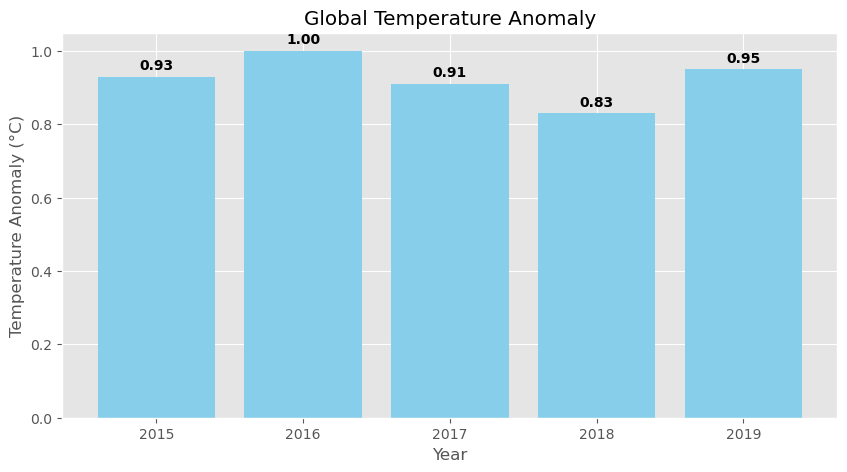

In [88]:
import matplotlib.pyplot as plt

# Ensure the year column and temp column are numeric
df[year_column] = pd.to_numeric(df[year_column], errors='coerce')
df[temp_column] = pd.to_numeric(df[temp_column], errors='coerce')

# Drop NaN values after conversion
df = df.dropna(subset=[year_column, temp_column])

# Debugging: Print data types and check first few values
print(df.dtypes)
print(df[[year_column, temp_column]].head())

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(df[year_column], df[temp_column], color='skyblue')

# Add annotations to each bar
for i, temp in enumerate(df[temp_column].values):
    try:
        year_value = df[year_column].iloc[i]  # Ensure it's a valid value
        temp_value = float(temp)  # Ensure it's float

        print(f"Annotating: Year = {year_value}, Temp = {temp_value}")  # Debugging print

        plt.text(year_value, temp_value + 0.02, f'{temp_value:.2f}', 
                 ha='center', fontsize=10, fontweight='bold')
    except Exception as e:
        print(f"Error at index {i}: {e}")

plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Anomaly")
plt.show()
